In [5]:
from preamble import *

In [6]:
columns =  ['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN',
       'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'EY', 'PG', 'WC',
       'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA']

In [7]:
myfile = "all/savedrecs.txt"
import codecs

doc = codecs.open(myfile,'rU','UTF-16')
df = pd.read_csv(doc,usecols=columns, sep='\t')

#print(set(df.keys()).difference(columns))
df=df.where((pd.notnull(df)), None)

In [8]:
print(df.keys())

Index(['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN',
       'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'EY', 'PG', 'WC',
       'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA'],
      dtype='object')


In [25]:
df.iloc[0]

PT                                                    J
AU                                OREGAN, B; GRATZEL, M
BA                                                 None
BE                                                 None
GP                                                 None
AF                                OREGAN, B; GRATZEL, M
BF                                                 None
CA                                                 None
TI    A LOW-COST, HIGH-EFFICIENCY SOLAR-CELL BASED O...
SO                                               NATURE
SE                                                 None
BS                                                 None
LA                                              English
DT                                              Article
CT                                                 None
CY                                                 None
CL                                                 None
SP                                              

In [10]:
df.head()

,PT,AU,BA,BE,...,OA,HC,HP,DA
0,J,"OREGAN, B; GRATZEL, M",None,None,...,None,None,None,2018-05-11
1,J,"NAZEERUDDIN, MK; KAY, A; RODICIO, I; HUMPHRYBA...",None,None,...,None,None,None,2018-05-11
2,J,"Hagfeldt, A; Boschloo, G; Sun, LC; Kloo, L; Pe...",None,None,...,None,Y,N,2018-05-11
3,J,"Kudo, A; Miseki, Y",None,None,...,None,Y,N,2018-05-11
4,J,"Atwater, HA; Polman, A",None,None,...,None,Y,N,2018-05-11


In [11]:
list_di=[]
for i in df["ID"]:
    if not i == None:
        for j in i.split(';'):
            list_di.append(j)

In [12]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

In [13]:
#print(len(list_di))
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

In [14]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          width=800, height=400,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list_di))

<Figure size 432x288 with 0 Axes>

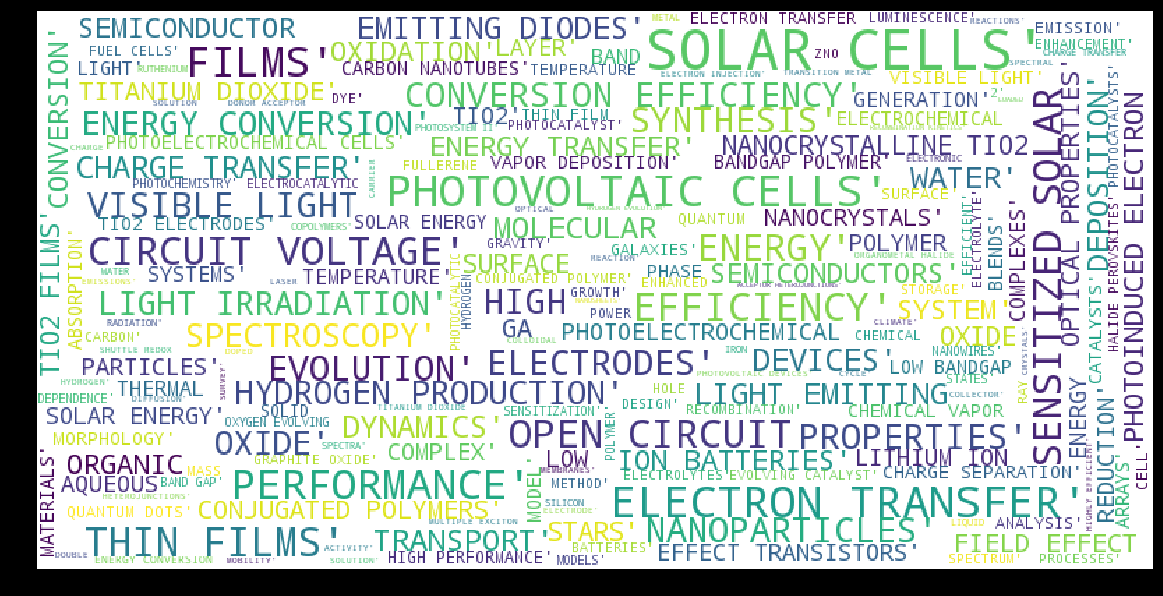

In [15]:
fig = plt.figure(1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("word1.png", dpi=1800)
plt.show()

In [16]:
temp = df["TI"]
#print(temp)
#temp.plot(kind='bar', xTitle = 'State name', yTitle = "# of incidents", title = 'Top States with highest number of Gun Violence')

<Figure size 432x288 with 0 Axes>

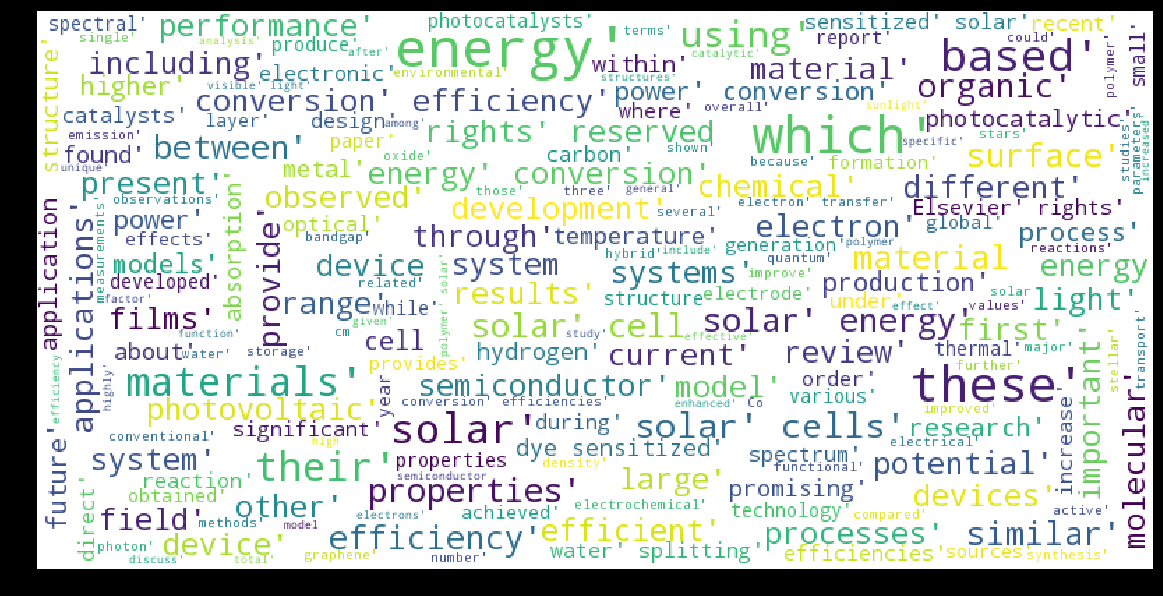

In [40]:
list_di=[]
for i in df["AB"]:
    if not i == None:
        for j in i.split(' '):
            list_di.append(j)

new_list =[i for i in list_di if len(i)>4]            
list_di = new_list

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          width=800, height=400,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list_di))

fig = plt.figure(1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
#fig.savefig("word1.png", dpi=1800)
plt.show()

In [17]:
import networkx as nx

In [18]:
G = nx.Graph()

In [24]:
df.iloc[0]['AU'].split(';')

['OREGAN, B', ' GRATZEL, M']

In [33]:
for i in df["AU"]:
            G.add_node(i.split(';')[0])

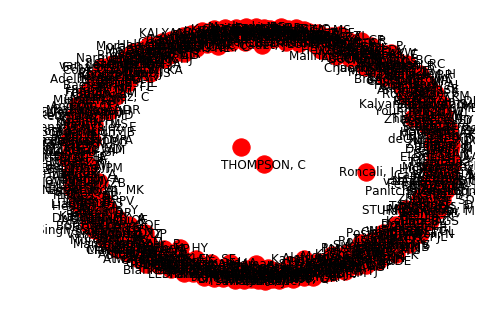

In [35]:
nx.draw(G, with_labels=True)
plt.show()

In [38]:
len(G.nodes())

476

In [ ]:
all_nodes = df['AU']
all_edges = df['']